<a href="https://colab.research.google.com/github/maa1and/ISC225/blob/main/ISC225_Week1_271021_%E6%B5%85%E9%87%8E%E3%81%BE%E3%81%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week1 データサイエンス概念レポート
ID: 271021 Name: Mana Asano

EX1-1

In [ ]:
import numpy as np
A = np.array([[1, 1], [0, 1], [1, 1], [1, 2]])

A_8x1 = A.reshape(8, 1) #Aを8x1行列に変換
print("1", A_8x1)

column_mean = np.mean(A, axis=0) #Aの列方向の平均ベクトル
print("2", column_mean)

row_mean = np.mean(A, axis=1) #Aの行方向の平均ベクトル
print("3", row_mean)

A_T = A.T #Aの転置行列
B = np.dot(A_T, A) #Aの積の行列
print("4", B, B.shape) #BをBのサイズとともに出力

bvalue, bvec = np.linalg.eig(B)
print("5", bvalue, bvec)

d = np.array([1,1])
#連立方程式Bx = dの解を以下の2通りで求める
x1 = np.linalg.solve(B, d) #np.linalg.solveで求める
x2 = np.dot(np.linalg.inv(B), d) #np.linalg.invで求める
print("7", x1, x2)

C = np.dot(A, A_T) #AとAの転置行列の積の行列
print(C, C.shape) #CをCのサイズとともに出力

d2 = np.array([1,1,1,1])
x3 = np.linalg.solve(C, d2) #行列が特異なため、エラー

1 [[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [2]]
2 [0.75 1.25]
3 [1.  0.5 1.  1.5]
4 [[3 4]
 [4 7]] (2, 2)
5 [0.52786405 9.47213595] [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]
7 [ 0.6 -0.2] [ 0.6 -0.2]
[[2 1 2 3]
 [1 1 1 2]
 [2 1 2 3]
 [3 2 3 5]] (4, 4)


LinAlgError: Singular matrix

EX1-2
1,2,...,10000のベクトルvを生成し、そのベクトルを10000x1行列と
1x10000行列に変換して、その二つの行列の積を計算

In [ ]:
%%time
v = np.arange(1, 10001) #1~10000までのベクトルを生成
v1 = v.reshape(10000, 1)
v2 = v.reshape(1, 10000)
A = np.dot(v1, v2) #形を変換したベクトルの積
print(A[:10, :10])

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
CPU times: user 654 ms, sys: 651 ms, total: 1.31 s
Wall time: 1.3 s


10000x10000のゼロ行列Aを生成し、ループ変数i,jを1から10000まで動かす二重forループをつくって、その中でA[i-1,j-1]の値を計算

In [ ]:
%%time
A = np.zeros((10000, 10000), dtype = int) #10000 * 10000のゼロ行列を生成
for i in range(10000): #i, jを1~10000まで操作する二重ループ
  for j in range(10000):
    A[i, j] = (i + 1) * (j + 1)
print(A[:10, :10])

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
CPU times: user 40.4 s, sys: 1.49 s, total: 41.9 s
Wall time: 45.6 s


最初に空リストA=[]を生成し、ループ変数iを1から10000まで動かす
最後にAをnumpy.array()でnpの行列に変換

In [ ]:
%%time
A = [] #空のリストを作成
for i in range(1, 10001):
  veclist = []
  for j in range(1, 10001):
    veclist.append(i * j)
  A.append(veclist)
A = np.array(A)
print(A[:10, :10])

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
CPU times: user 28.7 s, sys: 5.32 s, total: 34 s
Wall time: 35.4 s


EX1-3
𝑓(𝑥) = 𝑥 ∗∗ 2 − 2 ∗ 𝑥 + 1

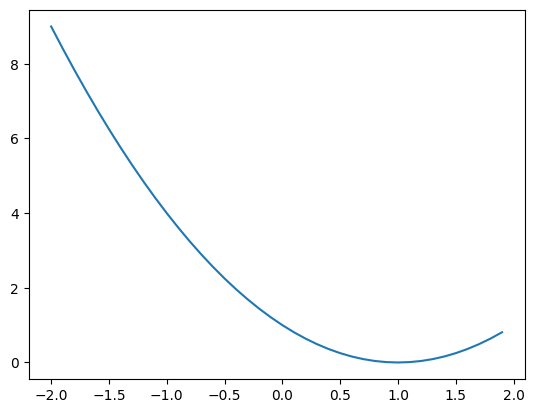

In [ ]:
import matplotlib.pyplot as plt

def f(x): #関数を定義
  return x ** 2 - 2 * x + 1

xlist = np.arange(-2, 2, 0.1)
ylist = [f(x) for x in xlist] #関数にxlistを代入した値をそれぞれylistに格納
plt.plot(xlist, ylist) #グラフを描画
plt.show()

EX1-4

In [ ]:
min_index = np.argmin(ylist)
xmin = xlist[min_index]
ymin = ylist[min_index]
print("最小値をとるリストのインデックス:", min_index, "その時の値:", xmin, "最小値:", ymin)

最小値をとるリストのインデックス: 30 その時の値: 1.0000000000000027 最小値: 0.0
